In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy .stats as stats
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# import dataset
data=pd.read_csv("D:/Data Science/Assignments/Simple linear regration/delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


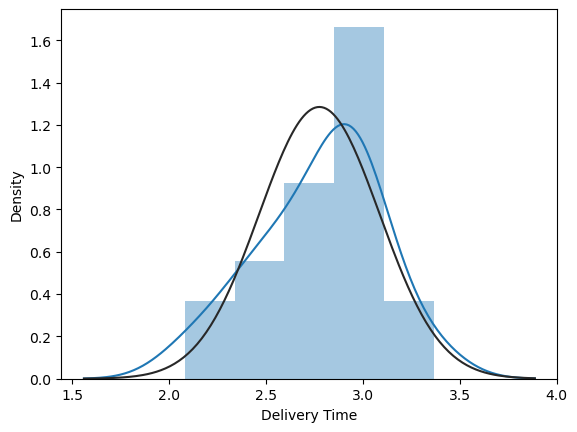

<Figure size 640x480 with 0 Axes>

In [4]:
data_log = pd.DataFrame()
data_log['Delivery Time'] = np.log(data['Delivery Time'])
data_log['Delivery Time'] = np.log(data['Delivery Time'])
sns.distplot(data_log['Delivery Time'], fit=norm)
fig = plt.figure()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


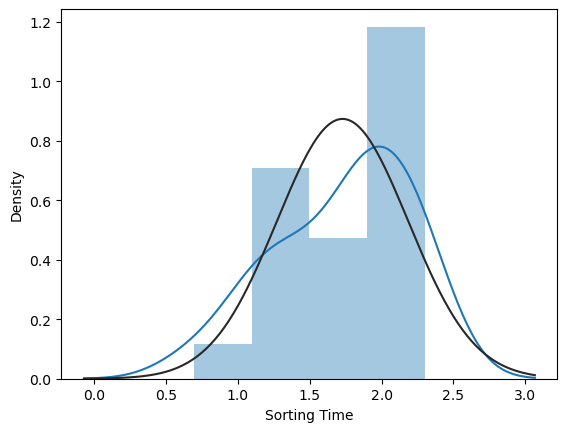

<Figure size 640x480 with 0 Axes>

In [5]:
data_log = pd.DataFrame()
data_log['Sorting Time'] = np.log(data['Sorting Time'])
data_log['Sorting Time'] = np.log(data['Sorting Time'])
sns.distplot(data_log['Sorting Time'], fit=norm)
fig = plt.figure()

# Feature Engineering

In [6]:
# Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
print(data_log.columns)


Index(['Sorting Time'], dtype='object')


In [8]:
data_log = data_log.rename(columns={'Sorting_Time': 'sorting_time'})

In [9]:
data_log['sorting_time'] = np.log(data['sorting_time'])
data_log

,Sorting Time,sorting_time
0,2.302585,2.302585
1,1.386294,1.386294
2,1.791759,1.791759
3,2.197225,2.197225
4,2.302585,2.302585
5,1.791759,1.791759
6,1.945910,1.945910
7,1.098612,1.098612
8,2.302585,2.302585
9,2.197225,2.197225


# Correlation Analysis

In [10]:

data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

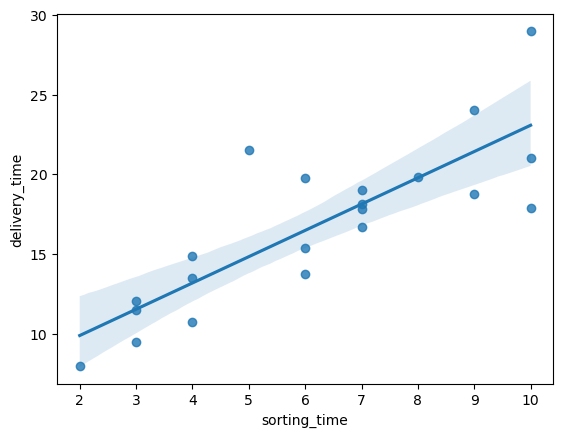

In [11]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

# Model Building

In [12]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()

# Model Testing

In [13]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [14]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [15]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [16]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [17]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [18]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [19]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64